# Horizontal Bar Charts

In the previous lecture, we treated how to plot normal bar charts, moving on from there, we are going to be exploring horizontal bar charts which are very similar to the normal bar charts except from their orientation.

# Plt.barh()

In [3]:
#import all necessary modules
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style('white')

In [4]:
#using the help() function 
help(plt.barh)

Help on function barh in module matplotlib.pyplot:

barh(y, width, height=0.8, left=None, *, align='center', **kwargs)
    Make a horizontal bar plot.
    
    The bars are positioned at *y* with the given *align*\ment. Their
    dimensions are given by *width* and *height*. The horizontal baseline
    is *left* (default 0).
    
    Many parameters can take either a single value applying to all bars
    or a sequence of values, one for each bar.
    
    Parameters
    ----------
    y : float or array-like
        The y coordinates of the bars. See also *align* for the
        alignment of the bars to the coordinates.
    
    width : float or array-like
        The width(s) of the bars.
    
    height : float or array-like, default: 0.8
        The heights of the bars.
    
    left : float or array-like, default: 0
        The x coordinates of the left sides of the bars.
    
    align : {'center', 'edge'}, default: 'center'
        Alignment of the base to the *y* coordinates*:
 

In [5]:
#from the documentation above, it is quite clear that the horizontal bar chart is similar to the normal bar chart
#everything you learnt about the barplot is applicable with few or no changes

#create datasets
country = ['Nigeria', 'USA', 'Saudi', 'Russia', 'China', 'Canada']
O_P = [10000, 60000, 50000, 40000, 20000, 30000]#O_P stands for oil production(this are nit the correct values)
df = pd.DataFrame({'Country': country, 'Production': O_P})

df


,Country,Production
0,Nigeria,10000
1,USA,60000
2,Saudi,50000
3,Russia,40000
4,China,20000
5,Canada,30000


In [ ]:
plt.barh(df['Country'],df['Production'])
plt.show()

In [10]:
#I won't focus much on this, because it is literally the same thing with the normal barplots
#in terms of formatting and colors, you can play around with it to find out

Task 

TypeError: can only concatenate str (not "float") to str

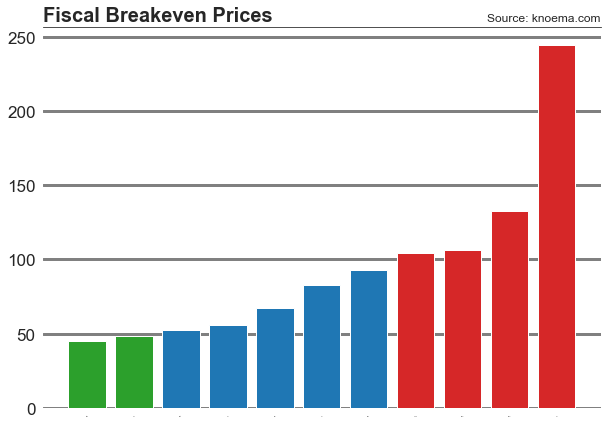

In [27]:
#Convert the chart below to a horizontal bar plot and figure out what is wrong if it doesn't work, go ahead to correct it
#Note: it has to the with the annotation of values
df = pd.read_excel('/Users/Hp/Desktop/Breakeven_Oil_Prices.xlsx', sheet_name = 'fiscal')

colors = []
for price in df['breakeven']:
    if price <= 50:
        tt = 'tab:green'
    elif price <= 100:
        tt = 'tab:blue'
    else:
        tt = 'tab:red'
    colors.append(tt)
    
df['colors'] = pd.DataFrame(colors)    

df = df.sort_values(by = 'breakeven', ascending = True)
colors = [i for i in df['colors']]



fig, ax = plt.subplots(figsize = (10,7))
ax.bar(df['country'], df['breakeven'], color  = colors)
ax.spines['right'].set_visible(False)             
# ax.spines['top'].set_visible(False)             
ax.spines['left'].set_visible(False)             
ax.spines['bottom'].set_visible(False)
plt.grid(which = 'major', axis = 'y', lw = 3, color = 'grey')
plt.xticks(fontsize = 1)
plt.yticks(fontsize = 17)
plt.title('Fiscal Breakeven Prices', fontsize = 20, fontweight = 'bold', loc = 'left')
plt.title('Source: knoema.com', loc = 'right')
for i, v in list(zip(df['breakeven'], df['country'])):
  ax.text(v+0.5, i, str('${:.1f}'.format(i)), fontsize = 13)

# Multiple Bar Charts

There is no special function to plot multiple bar charts, rather they are a manipulation of your normal bar charts; Remember when I taught you about chanfing the xlabels to integers when plotting, this is when you will see the main application of that trick.

Multiple bar charts justs include plotting 2+ values on the x-axis by manipulating the position of the x-ticks and setting the width to a partticular size for all bars.

There are 2 things you need to know;
plt.bar(x, height, width=0.8) includes the width function which can be set manually by you before plotting, in other to make your plots come out as planned, you have to choose a width that is approximate to the distance between the various heights(your y values of your datasets)

Enough talk...


In [29]:
#Let us create our datasets
country = ['Nigeria', 'USA', 'Saudi', 'Russia', 'China', 'Canada']
O_P = [10000, 60000, 50000, 40000, 20000, 30000]#O_P stands for oil production(this are not the correct values)
O_C = [8000, 80000, 40000, 35000, 80000, 25000]#O_C stnads for oil consumption
df2 = pd.DataFrame({'Country': country, 'Production': O_P, 'Consumption': O_C})

df2

,Country,Production,Consumption
0,Nigeria,10000,8000
1,USA,60000,80000
2,Saudi,50000,40000
3,Russia,40000,35000
4,China,20000,80000
5,Canada,30000,25000


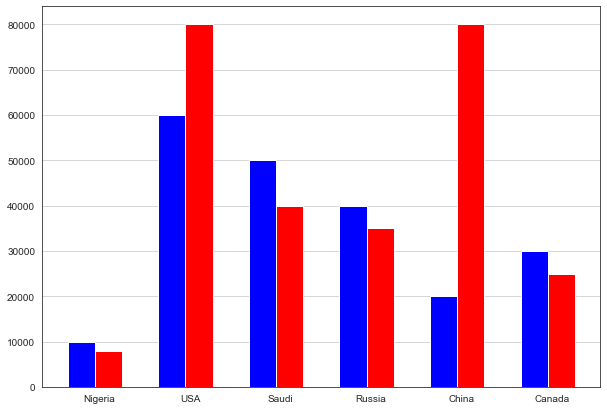

In [43]:
#creating a multiple bar chart
x = np.arange(0, len(df2))
w = 0.3#setting the width as 0.3
fig, ax = plt.subplots(figsize = (10,7))
ax.bar(x, df2['Production'], width  = w,  color = 'blue')
ax.bar(x+w, df2['Consumption'], width = w, color = 'red')
plt.xticks(x+0.2, df2['Country'], fontsize  = 10)#try using 0.1, 0.3, 0.4 in place of the 0.2 and see what you come up with
plt.grid(which = 'major', axis = 'y')

In [44]:
#Let us try 3 y values
#add to our dataset
ems = [4000, 20000, 10000, 15000, 20000, 18000]
df2['Emissions'] = ems
df2

,Country,Production,Consumption,Emissions
0,Nigeria,10000,8000,4000
1,USA,60000,80000,20000
2,Saudi,50000,40000,10000
3,Russia,40000,35000,15000
4,China,20000,80000,20000
5,Canada,30000,25000,18000


Ooops! That came out bad
Why??
Maybe because I forgot to set my width!!!

Let's fix that


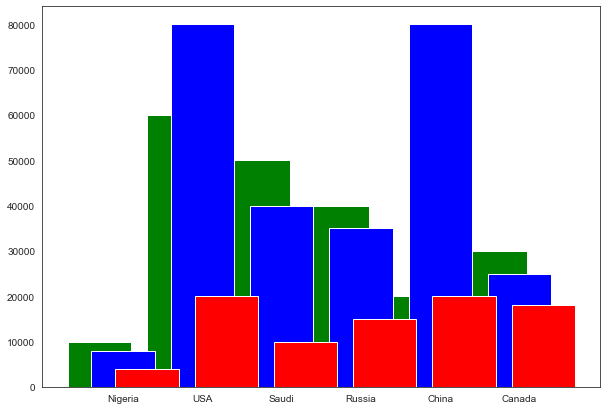

In [49]:
fig, ax = plt.subplots(figsize = (10, 7))
ax.bar(x-w, df2['Production'], color = 'green')
ax.bar(x, df2['Consumption'], color = 'blue')
ax.bar(x+w, df2['Emissions'], color = 'red')
plt.xticks(x, df2['Country'], fontsize = 10)
print('Ooops! That came out bad\nWhy??\nMaybe because I forgot to set my width!!!\n\nLet\'s fix that')

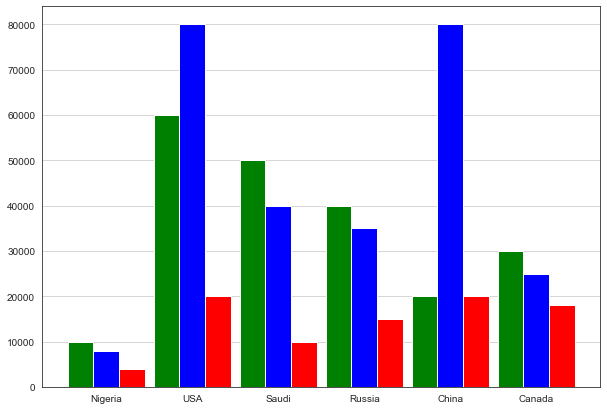

In [54]:
fig, ax = plt.subplots(figsize = (10, 7))
ax.bar(x-w, df2['Production'], width = w, color = 'green')
ax.bar(x, df2['Consumption'], width = w, color = 'blue')
ax.bar(x+w, df2['Emissions'], width =w, color = 'red')
plt.xticks(x, df2['Country'], fontsize = 10)
plt.grid(which = 'major', axis = 'y')



Learn how to play with the positional values until you get something you are comfortable with


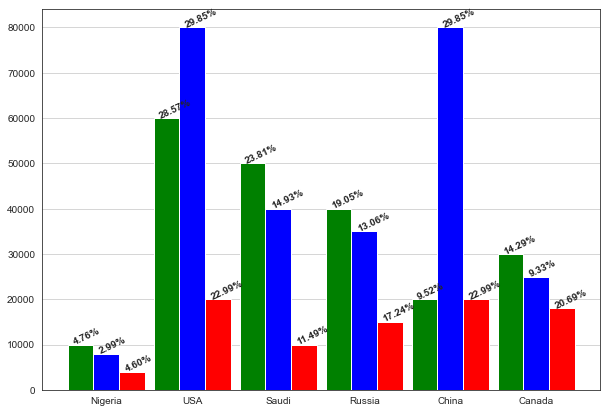

In [67]:
#Let us now add texts to the charts and make them more detailed
fig, ax = plt.subplots(figsize = (10, 7))
ax.bar(x-w, df2['Production'], width = w, color = 'green')
ax.bar(x, df2['Consumption'], width = w, color = 'blue')
ax.bar(x+w, df2['Emissions'], width =w, color = 'red')
plt.xticks(x, df2['Country'], fontsize = 10)
plt.grid(which = 'major', axis = 'y')
for i, v in list(zip(x-w, df2['Production'])):
    ax.text(i-0.1, v, str('{:.2f}%'.format((v/df2['Production'].sum())*100)), fontsize = 10, fontweight = 'bold', rotation = 25)
for i, v in list(zip(x, df2['Consumption'])):
    ax.text(i-0.1, v, str('{:.2f}%'.format((v/df2['Consumption'].sum())*100)), fontsize = 10, fontweight = 'bold', rotation = 25)
for i, v in list(zip(x+w, df2['Emissions'])):
    ax.text(i-0.1, v, str('{:.2f}%'.format((v/df2['Emissions'].sum())*100)), fontsize = 10, fontweight = 'bold', rotation = 25)
print('\n\nLearn how to play with the positional values until you get something you are comfortable with')

In [68]:
#You can also create the horizontal bar charts

Task 2: Create an horizontal barplots of the chart above